In [21]:
!pip install nltk
!pip install textblob


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

plt.style.use('ggplot')

In [2]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c_yw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\c_yw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\c_yw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\c_yw\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\c_yw\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
df = pd.read_csv('data/cleaned_combined_data.csv')

In [4]:
df['row_id'] = df.index + 1
df

,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id,row_id
0,[deleted],My reward for finally finishing my bachelor’s ...,2022-03-29T02:55:49Z,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post,NaN,1
1,nguit98,100k miles,2024-02-23T08:24:57Z,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN,2
2,labdweller,Rabbit stowage area on the i3,2023-03-14T18:13:18Z,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post,NaN,3
3,toteratte21,Picked her up straight from the source in Munich,2023-05-25T16:42:53Z,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post,NaN,4
4,azscram9,Picked up this little gem over the weekend,2023-05-22T01:33:12Z,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49361,mariscvaco,Fake Email,2022-06-01T10:31:26Z,NaN,iaqnmqn,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0,49362
49362,[deleted],fake,2022-06-01T11:53:29Z,NaN,iaqwyap,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-33,teslamotors,NaN,NaN,comment,t3_v25ee0,49363
49363,shitaki13,Looks fake. Why would you have to block Elon’s...,2022-06-01T11:09:42Z,NaN,iaqs6p4,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0,49364
49364,jrr6415sun,That’s an email sent to execs though. It doesn...,2022-06-01T11:18:15Z,NaN,iaqt5uv,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-15,teslamotors,NaN,NaN,comment,t3_v25ee0,49365


# VADER
KIV : Does not account for relationship between words

In [25]:
sia = SentimentIntensityAnalyzer()

In [26]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text =row['text']
    myid = row['row_id']
    res[myid]= sia.polarity_scores(text)
   

  0%|          | 0/49366 [00:00<?, ?it/s]

In [27]:
vaders = pd.DataFrame(res).T
vaders =vaders.reset_index().rename(columns={'index':'row_id'})
vaders = vaders.merge(df, how='left')


In [28]:
vaders

,row_id,neg,neu,pos,compound,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id
0,1,0.063,0.673,0.265,0.8275,[deleted],My reward for finally finishing my bachelor’s ...,2022-03-29T02:55:49Z,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post,NaN
1,2,0.000,1.000,0.000,0.0000,nguit98,100k miles,2024-02-23T08:24:57Z,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN
2,3,0.000,1.000,0.000,0.0000,labdweller,Rabbit stowage area on the i3,2023-03-14T18:13:18Z,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post,NaN
3,4,0.000,0.808,0.192,0.2263,toteratte21,Picked her up straight from the source in Munich,2023-05-25T16:42:53Z,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post,NaN
4,5,0.000,1.000,0.000,0.0000,azscram9,Picked up this little gem over the weekend,2023-05-22T01:33:12Z,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49361,49362,0.756,0.244,0.000,-0.4767,mariscvaco,Fake Email,2022-06-01T10:31:26Z,NaN,iaqnmqn,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49362,49363,1.000,0.000,0.000,-0.4767,[deleted],fake,2022-06-01T11:53:29Z,NaN,iaqwyap,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-33,teslamotors,NaN,NaN,comment,t3_v25ee0
49363,49364,0.305,0.558,0.137,-0.5106,shitaki13,Looks fake. Why would you have to block Elon’s...,2022-06-01T11:09:42Z,NaN,iaqs6p4,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49364,49365,0.000,1.000,0.000,0.0000,jrr6415sun,That’s an email sent to execs though. It doesn...,2022-06-01T11:18:15Z,NaN,iaqt5uv,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-15,teslamotors,NaN,NaN,comment,t3_v25ee0


In [29]:
def get_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
def get_subjectivity(compound_score):
    if compound_score !=0 :
        return 'subjective' 
    else:
        return 'objective'
    
vaders['vader_sentiment'] = vaders['compound'].apply(get_sentiment)
vaders['vader_subjectivity'] = vaders['compound'].apply(get_subjectivity)


In [31]:
vaders

,row_id,neg,neu,pos,compound,vader_sentiment,vader_subjectivity,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id
0,1,0.063,0.673,0.265,0.8275,positive,subjective,[deleted],My reward for finally finishing my bachelor’s ...,2022-03-29T02:55:49Z,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post,NaN
1,2,0.000,1.000,0.000,0.0000,neutral,objective,nguit98,100k miles,2024-02-23T08:24:57Z,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN
2,3,0.000,1.000,0.000,0.0000,neutral,objective,labdweller,Rabbit stowage area on the i3,2023-03-14T18:13:18Z,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post,NaN
3,4,0.000,0.808,0.192,0.2263,positive,subjective,toteratte21,Picked her up straight from the source in Munich,2023-05-25T16:42:53Z,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post,NaN
4,5,0.000,1.000,0.000,0.0000,neutral,objective,azscram9,Picked up this little gem over the weekend,2023-05-22T01:33:12Z,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49361,49362,0.756,0.244,0.000,-0.4767,negative,subjective,mariscvaco,Fake Email,2022-06-01T10:31:26Z,NaN,iaqnmqn,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49362,49363,1.000,0.000,0.000,-0.4767,negative,subjective,[deleted],fake,2022-06-01T11:53:29Z,NaN,iaqwyap,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-33,teslamotors,NaN,NaN,comment,t3_v25ee0
49363,49364,0.305,0.558,0.137,-0.5106,negative,subjective,shitaki13,Looks fake. Why would you have to block Elon’s...,2022-06-01T11:09:42Z,NaN,iaqs6p4,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49364,49365,0.000,1.000,0.000,0.0000,neutral,objective,jrr6415sun,That’s an email sent to execs though. It doesn...,2022-06-01T11:18:15Z,NaN,iaqt5uv,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-15,teslamotors,NaN,NaN,comment,t3_v25ee0


In [32]:
#id unique test
def are_all_unique(column):
    return not column.duplicated().any()

is_unique = are_all_unique(vaders['id'])

if is_unique:
    print("All entries in the column are unique.")
else:
    print("There are duplicate entries in the column.")

All entries in the column are unique.


In [33]:
new_column_names = {
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound',
    
}

vaders.rename(columns=new_column_names, inplace=True)

In [34]:
vaders

,row_id,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,vader_subjectivity,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id
0,1,0.063,0.673,0.265,0.8275,positive,subjective,[deleted],My reward for finally finishing my bachelor’s ...,2022-03-29T02:55:49Z,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post,NaN
1,2,0.000,1.000,0.000,0.0000,neutral,objective,nguit98,100k miles,2024-02-23T08:24:57Z,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN
2,3,0.000,1.000,0.000,0.0000,neutral,objective,labdweller,Rabbit stowage area on the i3,2023-03-14T18:13:18Z,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post,NaN
3,4,0.000,0.808,0.192,0.2263,positive,subjective,toteratte21,Picked her up straight from the source in Munich,2023-05-25T16:42:53Z,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post,NaN
4,5,0.000,1.000,0.000,0.0000,neutral,objective,azscram9,Picked up this little gem over the weekend,2023-05-22T01:33:12Z,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49361,49362,0.756,0.244,0.000,-0.4767,negative,subjective,mariscvaco,Fake Email,2022-06-01T10:31:26Z,NaN,iaqnmqn,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49362,49363,1.000,0.000,0.000,-0.4767,negative,subjective,[deleted],fake,2022-06-01T11:53:29Z,NaN,iaqwyap,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-33,teslamotors,NaN,NaN,comment,t3_v25ee0
49363,49364,0.305,0.558,0.137,-0.5106,negative,subjective,shitaki13,Looks fake. Why would you have to block Elon’s...,2022-06-01T11:09:42Z,NaN,iaqs6p4,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49364,49365,0.000,1.000,0.000,0.0000,neutral,objective,jrr6415sun,That’s an email sent to execs though. It doesn...,2022-06-01T11:18:15Z,NaN,iaqt5uv,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-15,teslamotors,NaN,NaN,comment,t3_v25ee0


In [35]:
def tbSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def tbPolarity(text):
    return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
vaders["tbsubjectivityscore"] =   vaders["text"].apply(tbSubjectivity)
vaders["tbpolarityscore"] = vaders["text"].apply(tbPolarity)
def calculate_sentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
vaders["textblob_sentiment"] = vaders["tbpolarityscore"].apply(calculate_sentiment)


In [36]:
def get_tbsubjectivity(textblob_subjectivity):
    if textblob_subjectivity > 0.5 :
        return 'subjective' 
    else:
        return 'objective'
    
vaders["textblob_subjectivity"] = vaders['tbsubjectivityscore'].apply(get_tbsubjectivity)

In [38]:
vaders = vaders[['row_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'vader_sentiment','vader_subjectivity','tbpolarityscore','textblob_sentiment','tbsubjectivityscore','textblob_subjectivity', 'author', 'text', 'created_utc', 'edited', 'id', 'num_comments', 'permalink', 'score', 'subreddit_name', 'upvote_ratio', 'url', 'type', 'post_id']]

In [47]:
vaders

,row_id,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,vader_subjectivity,tbpolarityscore,textblob_sentiment,tbsubjectivityscore,...,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id
0,1,0.063,0.673,0.265,0.8275,positive,subjective,0.28125,positive,0.833333,...,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post,NaN
1,2,0.000,1.000,0.000,0.0000,neutral,objective,0.00000,neutral,0.000000,...,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN
2,3,0.000,1.000,0.000,0.0000,neutral,objective,0.00000,neutral,0.000000,...,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post,NaN
3,4,0.000,0.808,0.192,0.2263,positive,subjective,0.20000,positive,0.400000,...,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post,NaN
4,5,0.000,1.000,0.000,0.0000,neutral,objective,-0.18750,negative,0.500000,...,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49361,49362,0.756,0.244,0.000,-0.4767,negative,subjective,-0.50000,negative,1.000000,...,NaN,iaqnmqn,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49362,49363,1.000,0.000,0.000,-0.4767,negative,subjective,-0.50000,negative,1.000000,...,NaN,iaqwyap,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-33,teslamotors,NaN,NaN,comment,t3_v25ee0
49363,49364,0.305,0.558,0.137,-0.5106,negative,subjective,-0.15000,negative,0.850000,...,NaN,iaqs6p4,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0
49364,49365,0.000,1.000,0.000,0.0000,neutral,objective,0.00000,neutral,0.000000,...,NaN,iaqt5uv,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-15,teslamotors,NaN,NaN,comment,t3_v25ee0


In [40]:
vaders.to_csv('VadersTextBlobCombinedData.csv', index=False)

In [109]:
annotateddf = pd.read_csv('popular_comment_Bolt_annotate_Merged.csv')

In [110]:
annotateddf

,text,score,neg_score,neu_score,pos_score,label,annotator 1,irony 1,remove 1,annotator 2,irony 2,remove 2
0,An Ultium based Bolt with NACS and faster char...,219,0.004940,0.088701,0.906359,positive,0,0,NaN,0,0,NaN
1,They had to have something smaller than the Eq...,141,0.378837,0.540830,0.080333,neutral,-1,0,NaN,-1,1,NaN
2,Yes! I just came back to post this very same t...,55,0.003039,0.012690,0.984271,positive,1,0,NaN,1,0,NaN
3,Yes!!! So excited! Was thinking I was going to...,52,0.017278,0.055458,0.927264,positive,1,0,NaN,1,0,NaN
4,Interesting that they dropped the EV/EUV namep...,21,0.032266,0.881413,0.086321,neutral,0,1,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1191,"I coasted down a 6,000 feet mountain once… doe...",31,0.027956,0.749923,0.222121,neutral,0,0,NaN,0,0,NaN
1192,He's either driving slowly or driving in warm ...,21,0.805127,0.180456,0.014417,negative,-1,0,NaN,-1,0,NaN
1193,Do we have any idea what the record is for Bol...,4,0.018869,0.936033,0.045098,neutral,0,0,NaN,0,0,NaN
1194,I'll bet he hypermiles at 40mph on the Interst...,14,0.185064,0.530014,0.284922,neutral,0,0,NaN,0,0,NaN


In [111]:
merged_df = pd.merge(annotateddf, vaders, on='text', how='inner')

In [112]:
print(merged_df.columns)

Index(['text', 'score_x', 'neg_score', 'neu_score', 'pos_score', 'label',
       'annotator 1', 'irony 1', 'remove 1', 'annotator 2', 'irony 2',
       'remove 2', 'row_id', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'vader_sentiment', 'vader_subjectivity',
       'tbpolarityscore', 'textblob_sentiment', 'tbsubjectivityscore',
       'textblob_subjectivity', 'author', 'created_utc', 'edited', 'id',
       'num_comments', 'permalink', 'score_y', 'subreddit_name',
       'upvote_ratio', 'url', 'type', 'post_id'],
      dtype='object')


In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [115]:
merged_df['annotator_combined'] = np.where(merged_df['annotator 1'] == merged_df['annotator 2'], merged_df['annotator 1'], np.nan)
print(merged_df['annotator_combined'])
valid_count = merged_df['annotator_combined'].count()
print(valid_count)
merged_df.dropna(subset=['annotator_combined'], inplace=True)


0       0.0
1      -1.0
2       1.0
3       1.0
4       0.0
       ... 
1191    0.0
1192   -1.0
1193    0.0
1194    0.0
1195    1.0
Name: annotator_combined, Length: 1196, dtype: float64
1068
1068


In [116]:
merged_df['annotator_combined'] = merged_df['annotator_combined'].astype(str)
sentiment_mapping = {'-1.0': 'negative', '0.0': 'neutral', '1.0': 'positive'}

merged_df['annotator_combined'] = merged_df['annotator_combined'].replace(sentiment_mapping)

In [117]:
print(merged_df['vader_sentiment'])
print(merged_df['annotator_combined'])

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1191     neutral
1192    negative
1193     neutral
1194     neutral
1195    positive
Name: vader_sentiment, Length: 1068, dtype: object
0        neutral
1       negative
2       positive
3       positive
4        neutral
          ...   
1191     neutral
1192    negative
1193     neutral
1194     neutral
1195    positive
Name: annotator_combined, Length: 1068, dtype: object


In [118]:
accuracy = accuracy_score(merged_df['annotator_combined'], merged_df['vader_sentiment'])
precision = precision_score(merged_df['annotator_combined'], merged_df['vader_sentiment'], average='weighted')
recall = recall_score(merged_df['annotator_combined'], merged_df['vader_sentiment'], average='weighted')
f1 = f1_score(merged_df['annotator_combined'], merged_df['vader_sentiment'], average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5599250936329588
Precision: 0.5876105110616088
Recall: 0.5599250936329588
F1 Score: 0.5455676836231524


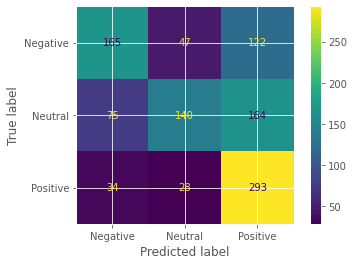

<Figure size 432x288 with 0 Axes>

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(merged_df['annotator_combined'], merged_df['vader_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Neutral', 'Positive'])
cmd.plot()
plt.show()

plt.savefig('confusion_matrix_vader.png')

In [120]:
accuracy = accuracy_score(merged_df['annotator_combined'], merged_df['textblob_sentiment'])
precision = precision_score(merged_df['annotator_combined'], merged_df['textblob_sentiment'], average='weighted')
recall = recall_score(merged_df['annotator_combined'], merged_df['textblob_sentiment'], average='weighted')
f1 = f1_score(merged_df['annotator_combined'], merged_df['textblob_sentiment'], average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5093632958801498
Precision: 0.5356610130119512
Recall: 0.5093632958801498
F1 Score: 0.4911503482664172


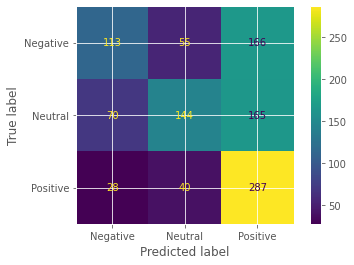

<Figure size 432x288 with 0 Axes>

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(merged_df['annotator_combined'], merged_df['textblob_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Neutral', 'Positive'])
cmd.plot()
plt.show()

plt.savefig('confusion_matrix_textblob.png')

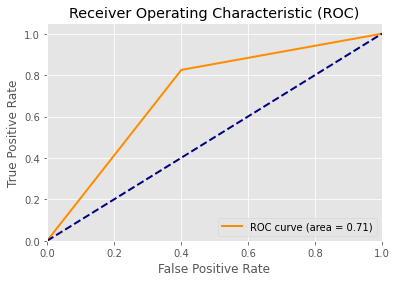

<Figure size 432x288 with 0 Axes>

In [140]:

labels = merged_df['annotator_combined']
classes = ['negative', 'neutral', 'positive']
y_true = label_binarize(labels, classes=classes)

# Assuming 'positive' class is considered as the positive class
# Convert sentiment scores to binary predictions
predicted_scores = merged_df['vader_sentiment']
y_score = label_binarize(predicted_scores, classes=classes)
n_classes = len(classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for the positive class
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

plt.savefig('roc_vader.png')

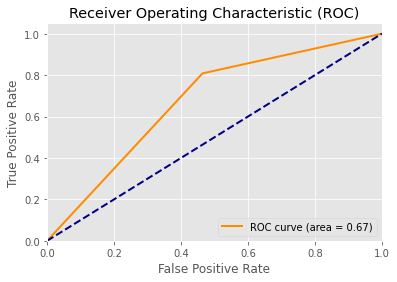

<Figure size 432x288 with 0 Axes>

In [141]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

labels = merged_df['annotator_combined']
classes = ['negative', 'neutral', 'positive']
y_true = label_binarize(labels, classes=classes)

# Assuming 'positive' class is considered as the positive class
# Convert sentiment scores to binary predictions
predicted_scores = merged_df['textblob_sentiment']
y_score = label_binarize(predicted_scores, classes=classes)
n_classes = len(classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for the positive class
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc_textblob.png')